# Objekt-orientiertes ABM
### Angewandte Systemwissenschaften I
#### Python - Wonderland

## The Schelling model

In [100]:
import random

class Environment:
    def __init__(self, dim, agents):
        self.dim = dim
        self.fields = [[None for y in range(dim)]
            for x in range(dim)
        ]
        for a in agents:
            x,y = random.choice(self.free_fields())
            self.fields[x][y] = a
     
    def get_agents(self):
        return [agent
                for ys in self.fields
                for agent in ys
                if agent != None
               ]
    
    def get_neighbors(self,x,y):
        neighbors = [self.fields[xx%self.dim][yy%self.dim]
                for xx in range(x-1,x+2)
                for yy in range(y-1,y+2)
                if xx != x or yy != y
               ]
        return [n for n in neighbors if n != None]
    
    def free_fields(self):
        return [(x,y)
                for x,ys in enumerate(self.fields)
                for y,agent in enumerate(ys)
                if agent == None
               ]
    
    def step(self):
        moves = list()
        for x, ys in enumerate(self.fields):
            for y, agent in enumerate(ys):
                if agent != None and agent.wants_to_move(self.get_neighbors(x,y)):
                    moves.append((x,y))
        
        for x,y in moves:
            x_neu, y_neu = random.choice(self.free_fields())
            agent = self.fields[x][y]
            self.fields[x][y] = None
            self.fields[x_neu][y_neu] = agent
                    
        
class Agent:
    def __init__(self, color, threshold):
        self.color = color
        self.threshold = threshold
        
    def wants_to_move(self, neighbors):
        ns_other = [n for n in neighbors if n.color != self.color]
        return len(ns_other) > self.threshold

In [104]:
agents = [Agent('red', 2) for _ in range(1200)] + [Agent('blue', 2) for _ in range(1200)]
env = Environment(50, agents)

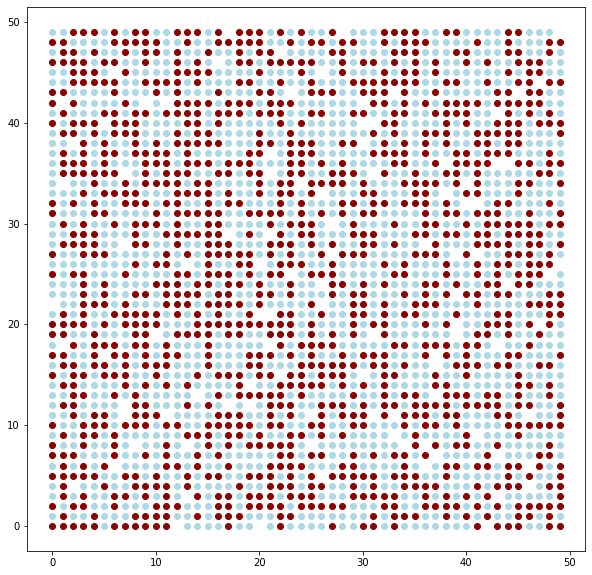

In [105]:
import matplotlib.pyplot as plt

def plot(env):
    fig,ax = plt.subplots(figsize=(10,10))
    red_agents = [(x,y)
                  for x, ys in enumerate(env.fields)
                  for y, agent in enumerate(ys)
                  if agent != None and agent.color == 'red'
                 ]
    blue_agents = [(x,y)
                  for x, ys in enumerate(env.fields)
                  for y, agent in enumerate(ys)
                  if agent != None and agent.color == 'blue']
    ax.scatter([x for x,_ in red_agents], [y for _,y in red_agents], color='darkred')
    ax.scatter([x for x,_ in blue_agents], [y for _,y in blue_agents], color='lightblue')

plot(env)

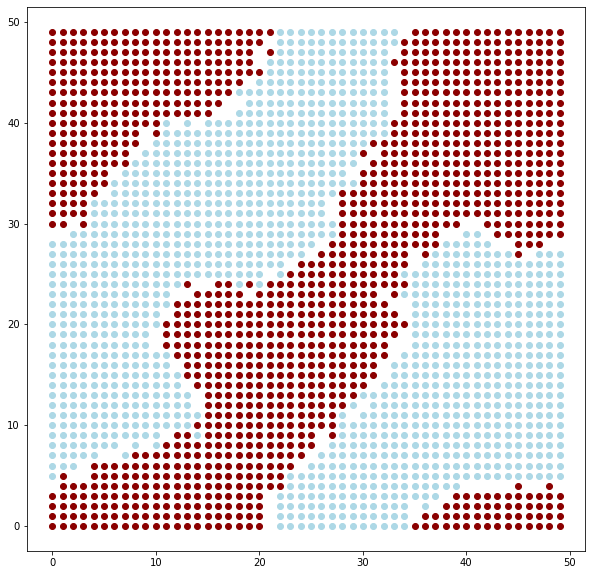

In [118]:
for tick in range(10):
    env.step()
plot(env)

# Alternative Version

(aus Vorbereitung)

In [119]:
import matplotlib.pyplot as plt
import random

In [120]:
class Env:
    def __init__(self, x_dim, y_dim):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.field = [[None for y in range(y_dim)] for x in range(x_dim)]
        
    def add_agents_from(self, agents):
        for agent in agents:
            self.field[agent.x][agent.y] = agent
        
    def neighbors(self, agent):
        return [self.field[x%self.x_dim][y%self.y_dim]
                for x in range(agent.x-1, agent.x+2)
                for y in range(agent.y-1, agent.y+2)
                if (x != agent.x or y != agent.y) and self.field[x%self.x_dim][y%self.y_dim] != None
               ]
    
    def free_spots(self):
        return [(x,y)
                for x,line in enumerate(self.field)
                for y,c in enumerate(line)
                if c == None
               ]
    
    def step(self):
        gen = (a for line in self.field for a in line if a != None)
        for a in gen:
            a.step(self)
               
    def move(self, agent):
        x,y = random.choice(self.free_spots())
        env.field[agent.x][agent.y] = None
        agent.x = x
        agent.y = y
        env.field[x][y] = agent

class SchellingAgent:
    def __init__(self, x, y, threshold, color):
        self.x = x
        self.y = y
        self.color = color
        self.threshold = threshold
        
    def step(self, env):
        ns = [n for n in env.neighbors(self) if n.color != self.color]
        if len(ns) > self.threshold:
            env.move(self)

In [121]:
def new_env(x_dim, y_dim, n_agents):
    env = Env(x_dim, y_dim)
    agents = [SchellingAgent(random.choice(range(x_dim))
                             , random.choice(range(y_dim))
                             , 1
                             , random.choice(['r', 'b'])
                            )
              for _ in range(n_agents)]
    env.add_agents_from(agents)
    return env, agents

def plot(agents):
    rs = [a for a in agents if a.color == 'r']
    bs = [a for a in agents if a.color == 'b']
    plt.scatter([r.x for r in rs], [r.y for r in rs], color='r')
    plt.scatter([b.x for b in bs], [b.y for b in bs], color='b')

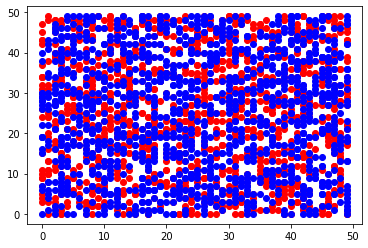

In [122]:
env, agents = new_env(50, 50, 50*50-10)
plot(agents)


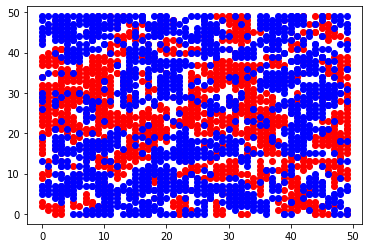

In [123]:
for _ in range(200):
    env.step()

plot(agents)

# Fireflies

In [131]:
class Agent:
    def __init__(self, counter):
        self.counter = counter
        self.blink = False
        
    def step(self, neighbors):
        if self.blink:
            self.blink = False
            self.counter = 0

        self.counter += 1
        if self.counter >= 10:
            self.blink = True
            
            
        if any(n.blink for n in neighbors):
            self.counter = 0

class Environment:
    def __init__(self, dim):
        self.dim = dim
        self.fields = [[Agent(random.choice(range(10))) for y in range(dim)]
            for x in range(dim)
        ]
     
    def get_agents(self):
        return [agent
                for ys in self.fields
                for agent in ys
               ]
    
    def get_neighbors(self,x,y):
        return [self.fields[xx%self.dim][yy%self.dim]
                for xx in range(x-1,x+2)
                for yy in range(y-1,y+2)
                if xx != x or yy != y
               ]
    
    def step(self):
        moves = list()
        for x, ys in enumerate(self.fields):
            for y, agent in enumerate(ys):
                ns = self.get_neighbors(x,y)
                agent.step(ns)


In [183]:
def plot_flies(env):
    fig,ax = plt.subplots(figsize=(3,3))
    blinking = [(x,y)
                  for x, ys in enumerate(env.fields)
                  for y, agent in enumerate(ys)
                  if agent.blink
                 ]
    dark = [(x,y)
                  for x, ys in enumerate(env.fields)
                  for y, agent in enumerate(ys)
                  if not agent.blink]
    ax.scatter([x for x,_ in blinking], [y for _,y in blinking], color='lightblue')
    ax.scatter([x for x,_ in dark], [y for _,y in dark], color='black')


In [184]:
env = Environment(10)

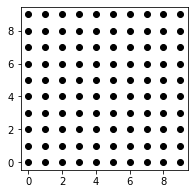

In [185]:
for _ in range(2000):
    env.step()
plot_flies(env)